# Red Blood Cells

In [468]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

## Load, convert to grayscale, resize

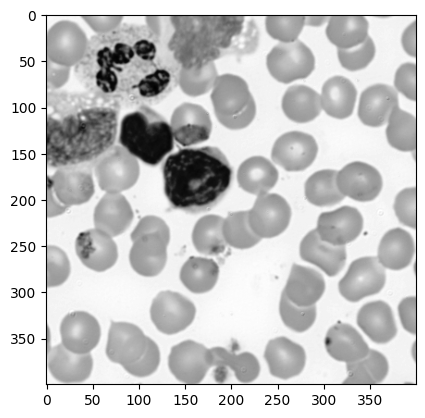

In [469]:
img = cv2.imread("blood.png")
img = cv2.resize(img, (400, 400)) # linear interpolation

orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

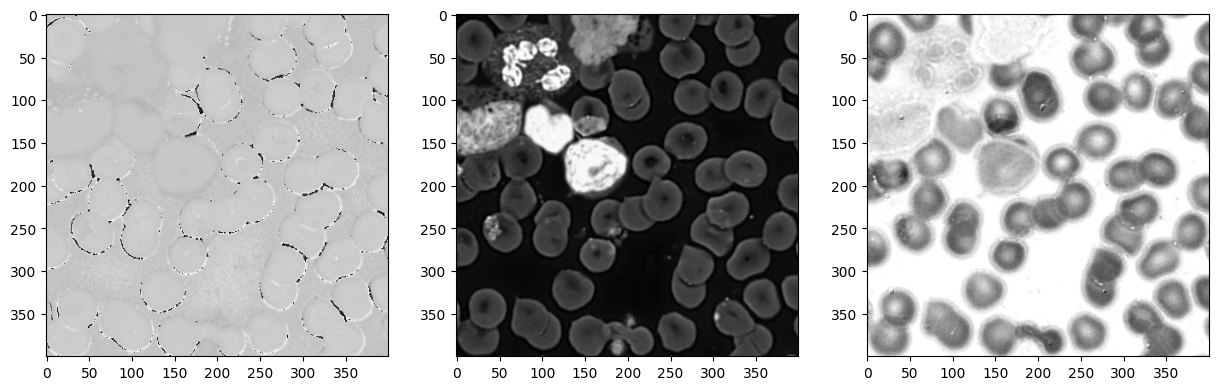

In [470]:
fig = plt.figure(figsize=(15,30))

hsv_split = cv2.split(hsv_img)

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(hsv_split[0], cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.imshow(hsv_split[1], cmap="gray")

fig.add_subplot(rows, columns, 3)
plt.imshow(hsv_split[2], cmap="gray")

plt.show()

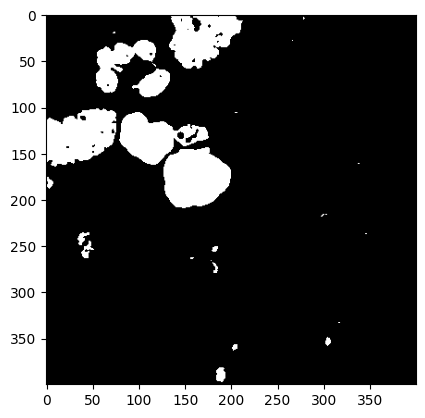

In [471]:
_, white_cells = cv2.threshold(hsv_split[1], 0, 255, cv2.THRESH_OTSU)
plt.imshow(white_cells, cmap="gray")

## Remove small blobs

In [472]:
contours, _ = cv2.findContours(white_cells, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

thresh = np.mean([cv2.contourArea(contour) for contour in contours])
mask = np.zeros_like(white_cells)

for contour in contours:
    area = cv2.contourArea(contour)
    if area > thresh:
        cv2.fillPoly(mask, [contour], 255)

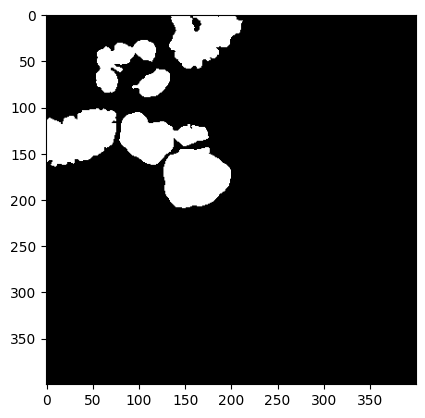

In [473]:
plt.imshow(mask, cmap="gray")

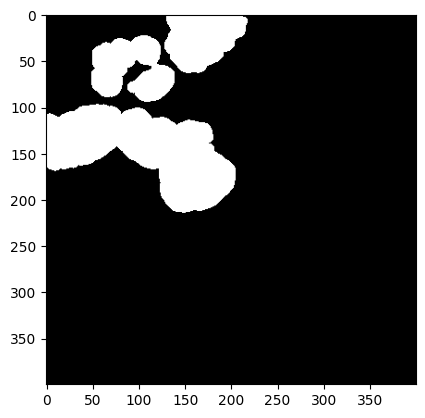

In [474]:
struct_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11)) 
mask = cv2.dilate(mask, struct_elem, iterations=1)
plt.imshow(mask, cmap="gray")

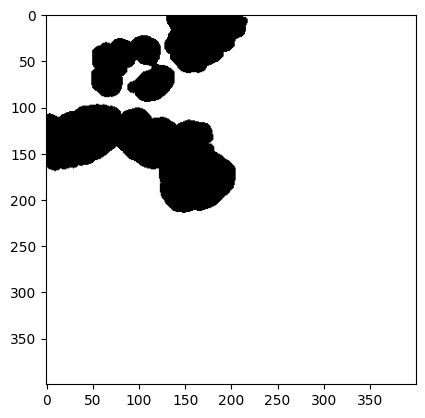

In [475]:
mask = cv2.bitwise_not(mask)
plt.imshow(mask, cmap="gray")

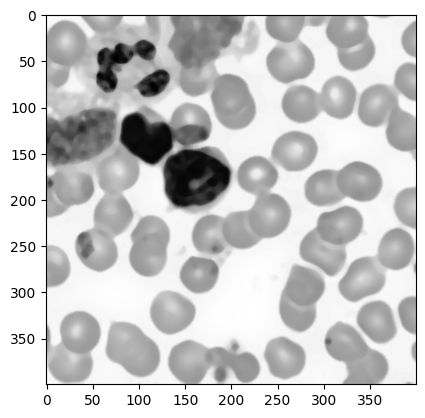

In [476]:
filtered = cv2.medianBlur(img, 7)
plt.imshow(filtered, cmap="gray")

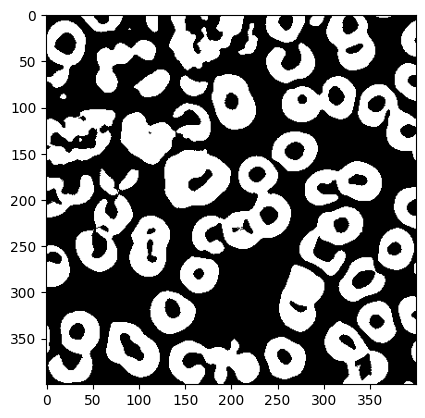

In [477]:
bin_img = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 41, 5)
plt.imshow(bin_img, cmap="gray")

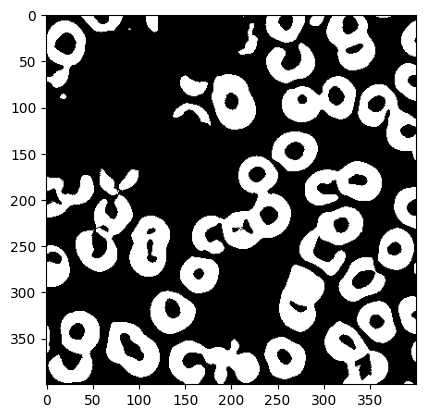

In [478]:
bin_img = cv2.bitwise_and(bin_img, mask)
plt.imshow(bin_img, cmap="gray")

In [479]:
contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of cells {len(contours)}")

Number of cells 47


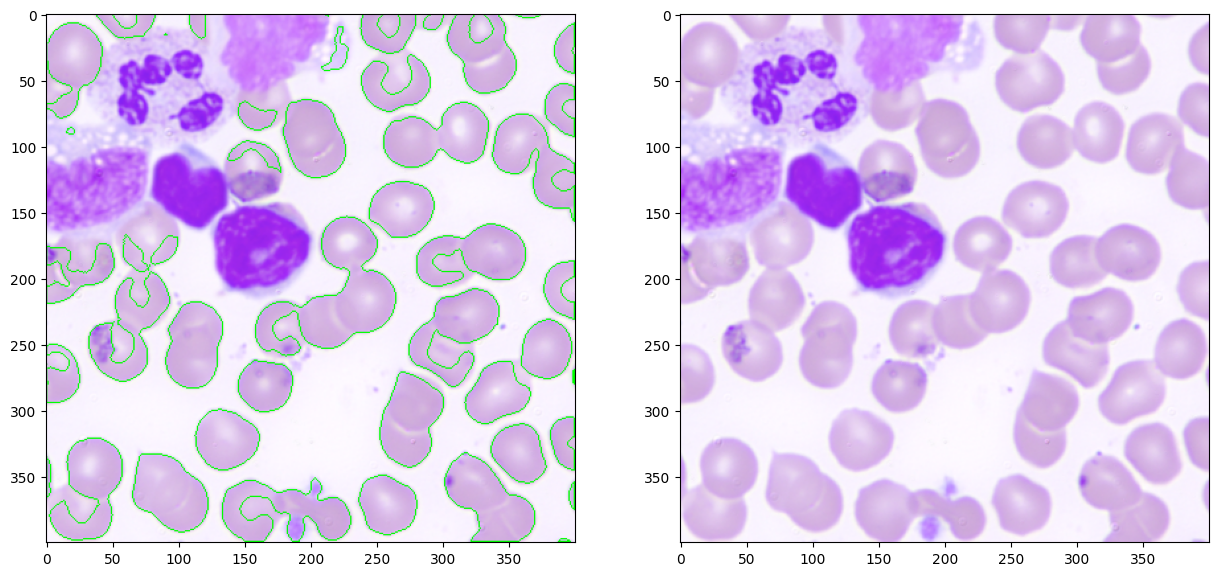

In [480]:
img_no_contours = copy.deepcopy(orig_img)
img_contours = cv2.drawContours(orig_img, contours, -1, (0, 255, 0))

fig = plt.figure(figsize=(15,30))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img_contours)

fig.add_subplot(rows, columns, 2)
plt.imshow(img_no_contours)

plt.show()